In [20]:
import numpy as np
import pandas as pd
from PIL import Image

In [2]:
skin_df = pd.read_csv('../raw_data/HAM10000_metadata.csv')

In [3]:
skin_df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [7]:
skin_df.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

In [22]:
skin_df['path'] = [f'../raw_data/HAM10000_images_all/{img}.jpg' for img in skin_df['image_id']]

In [23]:
skin_df

,lesion_id,image_id,dx,dx_type,age,sex,localization,path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_images_all/ISIC_0027419.jpg
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_images_all/ISIC_0025030.jpg
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_images_all/ISIC_0026769.jpg
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_images_all/ISIC_0025661.jpg
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,../raw_data/HAM10000_images_all/ISIC_0031633.jpg
...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,../raw_data/HAM10000_images_all/ISIC_0033084.jpg
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,../raw_data/HAM10000_images_all/ISIC_0033550.jpg
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,../raw_data/HAM10000_images_all/ISIC_0033536.jpg
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,../raw_data/HAM10000_images_all/ISIC_0032854.jpg


In [43]:
skin_df['image'] = skin_df['path'].map(lambda x: np.asarray(Image.open(x)))

In [44]:
skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,image
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_images_all/ISIC_0027419.jpg,"[[[188, 147, 191], [186, 148, 189], [187, 150,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_images_all/ISIC_0025030.jpg,"[[[25, 15, 23], [25, 14, 22], [25, 14, 22], [2..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_images_all/ISIC_0026769.jpg,"[[[186, 128, 140], [188, 128, 136], [183, 126,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_images_all/ISIC_0025661.jpg,"[[[24, 9, 16], [22, 11, 15], [23, 11, 15], [26..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,../raw_data/HAM10000_images_all/ISIC_0031633.jpg,"[[[122, 80, 102], [124, 82, 104], [127, 83, 10..."


In [50]:
np.resize(skin_df['image'][0], (244,244,3))

array([[[188, 147, 191],
        [186, 148, 189],
        [187, 150, 191],
        ...,
        [214, 173, 207],
        [216, 168, 206],
        [218, 167, 208]],

       [[217, 171, 208],
        [218, 173, 206],
        [214, 172, 208],
        ...,
        [190, 138, 161],
        [188, 133, 154],
        [191, 132, 152]],

       [[186, 131, 152],
        [189, 131, 153],
        [192, 133, 151],
        ...,
        [209, 158, 189],
        [208, 159, 189],
        [206, 156, 185]],

       ...,

       [[195, 132, 159],
        [193, 135, 159],
        [193, 138, 159],
        ...,
        [218, 172, 200],
        [218, 169, 199],
        [221, 172, 202]],

       [[216, 170, 199],
        [216, 170, 199],
        [216, 170, 199],
        ...,
        [219, 176, 204],
        [219, 179, 205],
        [220, 178, 202]],

       [[220, 178, 202],
        [219, 177, 197],
        [218, 177, 195],
        ...,
        [223, 188, 220],
        [220, 185, 218],
        [221, 186, 218]]

In [48]:
skin_df['image_resized'] = [np.resize(img, (244,244,3)) for img in skin_df['image']]

In [49]:
skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,image,image_resized
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_images_all/ISIC_0027419.jpg,"[[[188, 147, 191], [186, 148, 189], [187, 150,...","[[[188, 147, 191], [186, 148, 189], [187, 150,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_images_all/ISIC_0025030.jpg,"[[[25, 15, 23], [25, 14, 22], [25, 14, 22], [2...","[[[25, 15, 23], [25, 14, 22], [25, 14, 22], [2..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_images_all/ISIC_0026769.jpg,"[[[186, 128, 140], [188, 128, 136], [183, 126,...","[[[186, 128, 140], [188, 128, 136], [183, 126,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_images_all/ISIC_0025661.jpg,"[[[24, 9, 16], [22, 11, 15], [23, 11, 15], [26...","[[[24, 9, 16], [22, 11, 15], [23, 11, 15], [26..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,../raw_data/HAM10000_images_all/ISIC_0031633.jpg,"[[[122, 80, 102], [124, 82, 104], [127, 83, 10...","[[[122, 80, 102], [124, 82, 104], [127, 83, 10..."


In [53]:
skin_df.drop(columns=['image'], inplace = True)

In [54]:
skin_df

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,image_resized
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_images_all/ISIC_0027419.jpg,"[[[188, 147, 191], [186, 148, 189], [187, 150,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_images_all/ISIC_0025030.jpg,"[[[25, 15, 23], [25, 14, 22], [25, 14, 22], [2..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_images_all/ISIC_0026769.jpg,"[[[186, 128, 140], [188, 128, 136], [183, 126,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_images_all/ISIC_0025661.jpg,"[[[24, 9, 16], [22, 11, 15], [23, 11, 15], [26..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,../raw_data/HAM10000_images_all/ISIC_0031633.jpg,"[[[122, 80, 102], [124, 82, 104], [127, 83, 10..."
...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,../raw_data/HAM10000_images_all/ISIC_0033084.jpg,"[[[103, 79, 95], [109, 78, 93], [106, 80, 89],..."
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,../raw_data/HAM10000_images_all/ISIC_0033550.jpg,"[[[5, 5, 5], [2, 6, 5], [1, 6, 2], [6, 7, 2], ..."
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,../raw_data/HAM10000_images_all/ISIC_0033536.jpg,"[[[101, 86, 91], [109, 90, 94], [107, 94, 101]..."
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,../raw_data/HAM10000_images_all/ISIC_0032854.jpg,"[[[155, 113, 135], [156, 112, 135], [157, 114,..."


In [55]:
skin_df['image_resized'] = skin_df['image_resized']/255

In [56]:
skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,image_resized
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_images_all/ISIC_0027419.jpg,"[[[0.7372549019607844, 0.5764705882352941, 0.7..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_images_all/ISIC_0025030.jpg,"[[[0.09803921568627451, 0.058823529411764705, ..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_images_all/ISIC_0026769.jpg,"[[[0.7294117647058823, 0.5019607843137255, 0.5..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_images_all/ISIC_0025661.jpg,"[[[0.09411764705882353, 0.03529411764705882, 0..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,../raw_data/HAM10000_images_all/ISIC_0031633.jpg,"[[[0.47843137254901963, 0.3137254901960784, 0...."


In [88]:
X = skin_df['image_resized']

In [58]:
X.head()

0    [[[0.7372549019607844, 0.5764705882352941, 0.7...
1    [[[0.09803921568627451, 0.058823529411764705, ...
2    [[[0.7294117647058823, 0.5019607843137255, 0.5...
3    [[[0.09411764705882353, 0.03529411764705882, 0...
4    [[[0.47843137254901963, 0.3137254901960784, 0....
Name: image_resized, dtype: object

In [59]:
y = skin_df['dx']

In [76]:
y

0          bkl
1          bkl
2          bkl
3          bkl
4          bkl
         ...  
10010    akiec
10011    akiec
10012    akiec
10013    akiec
10014      mel
Name: dx, Length: 10015, dtype: object

In [72]:
y.unique()

array(['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec'], dtype=object)

In [73]:
dict_target = {'bkl':1, 'nv':2, 'df':3, 'mel':4, 'vasc':5, 'bcc':6, 'akiec':7}

In [74]:
y_num = y.map(dict_target.get)

In [75]:
y_num

0        1
1        1
2        1
3        1
4        1
        ..
10010    7
10011    7
10012    7
10013    7
10014    4
Name: dx, Length: 10015, dtype: int64

In [86]:
from tensorflow.keras.utils import to_categorical
y_cat = to_categorical(y_num, num_classes = 8)

In [87]:
y_cat

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.3, random_state=42)

In [90]:
X_train.shape

(7010,)

In [91]:
X_test.shape

(3005,)

In [102]:
belign_df = skin_df[skin_df['dx'] == 'bkl']['age']

In [100]:
tumor_df = skin_df[skin_df['dx'] != 'bkl']['age']

In [103]:
import seaborn as sns

<AxesSubplot:xlabel='age', ylabel='Count'>

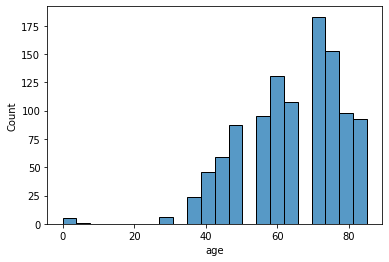

In [104]:
sns.histplot(data = belign_df)

<AxesSubplot:xlabel='age', ylabel='Count'>

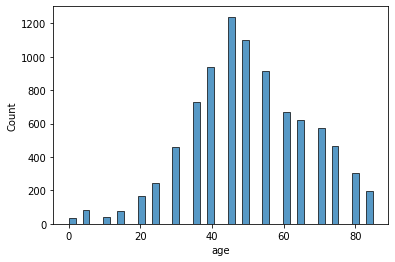

In [105]:
sns.histplot(data = tumor_df)

<AxesSubplot:xlabel='dx', ylabel='Count'>

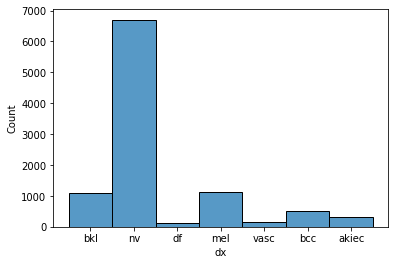

In [106]:
sns.histplot(data = skin_df['dx'])